# NLP Capstone Project: Airline Sentiment Analysis from Twitter Data

## Data Loading and Exploration

In [1]:
import pandas as pd

In [2]:
sentiment_df = pd.read_csv('sentiment_analysis/data/raw/Tweets.csv')
sentiment_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
from ydata_profiling import ProfileReport

sentiment_data_profile = ProfileReport(sentiment_df, title="Raw sentiment data report")

sentiment_data_profile.config.vars.num.low_categorical_threshold = 20

sentiment_data_profile.to_file('sentiment_analysis/data/reports/raw_sentiment_data_profile.html')

D:\GitHub repos\sentiment-analysis-nlp-training\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.84it/s]


In [7]:
from IPython.display import HTML

# HTML(filename="sentiment_analysis/data/reports/raw_sentiment_data_profile.html")

## Text cleaning

In [9]:
# Make copy of original data
df = sentiment_df.copy()



In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)           # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)                 # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)               # Remove special chars and digits
    text = text.lower()                                   # Convert to lowercase
    tokens = nltk.word_tokenize(text)                     # Tokenize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]  # Lemmatize & remove stopwords
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...


In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [13]:
df['clean_text'] = sentiment_df['text'].apply(clean_text)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving minute late flight warning communicati...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airline
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight dont answer phone suggesti...


In [18]:
print(df['clean_text'].head(25))

0                                                  said
1          plus youve added commercial experience tacky
2          didnt today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay flight seat didnt playing ...
6     yes nearly every time fly vx ear worm wont go ...
7     really missed prime opportunity men without ha...
8                                         well didntbut
9                 amazing arrived hour early youre good
10    know suicide second leading cause death among ...
11    lt pretty graphic much better minimal iconography
12    great deal already thinking nd trip amp havent...
13                     im flying sky u take away travel
14                                               thanks
15                            sfopdx schedule still mia
16    excited first cross country flight lax mco ive...
17    flew nyc sfo last week couldnt fully sit s

In [19]:
clean_text_df = df.copy()
clean_text_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving minute late flight warning communicati...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airline
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight dont answer phone suggesti...


## Data Preparation

In [ ]:
sentiment_df = df.copy()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load your cleaned DataFrame
sentiment_df['clean_text'] = sentiment_df['text'].apply(clean_text)  # assuming clean_text fn exists

# 2. Encode sentiment labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
sentiment_df['sentiment_label'] = sentiment_df['airline_sentiment'].map(label_mapping)

# 3. Select features & target
X = sentiment_df['clean_text']
y = sentiment_df['sentiment_label']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y                # preserve class balance
)

# 5. (Optional) Combine X & y back for saving
train_df = pd.DataFrame({'clean_text': X_train, 'sentiment_label': y_train})
test_df  = pd.DataFrame({'clean_text': X_test,  'sentiment_label': y_test})

# 6. Save splits for reproducibility
train_df.to_csv('sentiment_analysis/data/interim/train.csv', index=False)
test_df.to_csv('sentiment_analysis/data/interim/test.csv',  index=False)

# 7. (Optional) Save label mapping for downstream use
import json
with open('sentiment_analysis/data/processed/label_mapping.json', 'w') as f:
    json.dump(label_mapping, f, indent=2)

print(f"Train/test split saved: {train_df.shape[0]} train, {test_df.shape[0]} test examples.")


Train/test split saved: 11712 train, 2928 test examples.


## Feature Engineering

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

train_df = pd.read_csv('sentiment_analysis/data/interim/train.csv')
test_df  = pd.read_csv('sentiment_analysis/data/interim/test.csv')

train_df = train_df.dropna(subset=['clean_text'])
test_df  = test_df.dropna(subset=['clean_text'])

train_df = train_df[train_df['clean_text'].str.strip() != ""]
test_df  = test_df[ test_df['clean_text'].str.strip() != ""]


X_train_text = train_df['clean_text'].tolist()
X_test_text  = test_df['clean_text'].tolist()
y_train = train_df['sentiment_label']
y_test  = test_df['sentiment_label']

# 2. Initialize TF-IDF vectorizer
tfidf_vec = TfidfVectorizer(
    lowercase=False,         # already lowercased in cleaning
    ngram_range=(1, 2),      # unigrams + bigrams
    max_df=0.95,             # ignore too-common tokens
    min_df=5,                # ignore rare tokens
    max_features=10_000      # cap vocabulary size
)

# 3. Fit on training data & transform
X_train_tfidf = tfidf_vec.fit_transform(X_train_text)
X_test_tfidf  = tfidf_vec.transform(X_test_text)

print("TF-IDF feature matrix shapes:")
print(f"  X_train: {X_train_tfidf.shape}")
print(f"  X_test:  {X_test_tfidf.shape}")

# 4. Save vectorizer for later use in pipelines
joblib.dump(tfidf_vec, 'sentiment_analysis/models/tfidf_vectorizer.joblib')





TF-IDF feature matrix shapes:
  X_train: (11694, 3722)
  X_test:  (2920, 3722)


['sentiment_analysis/models/tfidf_vectorizer.joblib']

## Model Building

Using class weights: {np.int64(0): np.float64(0.5311350320207112), np.int64(1): np.float64(1.5787768327257998), np.int64(2): np.float64(2.066808059384942)}
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best hyperparameters: {'C': 1}

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.87      1833
     neutral       0.60      0.63      0.62       614
    positive       0.74      0.67      0.70       473

    accuracy                           0.79      2920
   macro avg       0.73      0.72      0.73      2920
weighted avg       0.79      0.79      0.79      2920


Overall metrics:
  Accuracy : 0.787
  Precision: 0.735
  Recall   : 0.723
  F1-score : 0.728


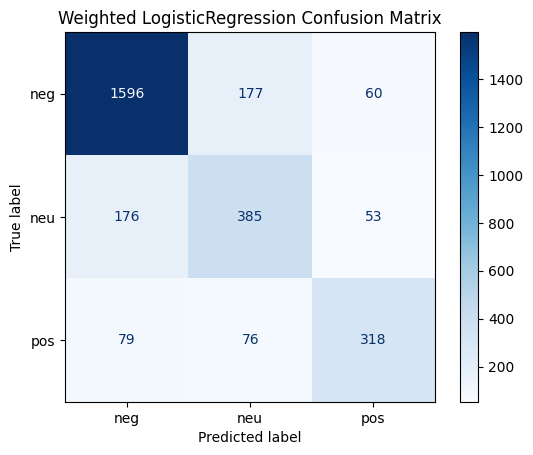


Saved model → sentiment_analysis/models/logreg_weighted_best.joblib


In [40]:
import joblib
import pandas as pd
import numpy as np

from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_recall_fscore_support
)
import matplotlib.pyplot as plt

# # 1. Load TF-IDF features & labels
# X_train = joblib.load('sentiment_analysis/models/X_train_tfidf.joblib')
# X_test  = joblib.load('sentiment_analysis/models/X_test_tfidf.joblib')
# y_train = pd.read_csv('sentiment_analysis/data/interim/train.csv')['sentiment_label']
# y_test  = pd.read_csv('sentiment_analysis/data/interim/test.csv')['sentiment_label']

# 2. Compute balanced class weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print("Using class weights:", class_weights)

# 3. Set up weighted LogisticRegression & hyperparameter grid
logreg = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    class_weight=class_weights
)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# 4. GridSearchCV optimizing macro-F1
grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("\nBest hyperparameters:", grid.best_params_)
best_model = grid.best_estimator_

# 5. Evaluate on test set
y_pred = best_model.predict(X_test)

# 5a. Classification report (text)
report_text = classification_report(
    y_test,
    y_pred,
    target_names=['negative','neutral','positive']
)
print("\nClassification Report:\n", report_text)

# 5b. Overall metrics
acc = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred,
    average='macro'
)
print(f"\nOverall metrics:\n"
      f"  Accuracy : {acc:.3f}\n"
      f"  Precision: {precision:.3f}\n"
      f"  Recall   : {recall:.3f}\n"
      f"  F1-score : {f1:.3f}")

# 6. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['neg','neu','pos'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Weighted LogisticRegression Confusion Matrix")
plt.show()

# 7. Save the best model
joblib.dump(best_model, 'sentiment_analysis/models/logreg_weighted_best.joblib')
print("\nSaved model → sentiment_analysis/models/logreg_weighted_best.joblib")
